# Further hypothesis testing

## Chapter 3. Multiple hypothesis correction and normality.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### 3.2 Testing for normality

Professor Xu thinks that the current system for classifying stars can be improved. In particular, she thinks that log(temperature) should be normally distributed for each star type.

She has asked you to find out whether this is true under the current classification system, and if not, which types should be revised.

Question: for which star types is log(temperature) normally distributed?

In [3]:
# Load data
data = pd.read_csv("stars.csv")
type_key = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant','Hypergiant']

#### i) Q-Q plot

We can use a Q-Q plot to investigate whether each sample resembles a normal distribution.

If we set

$x =$ the theoretical quantiles from the standard normal ($Z$) distribution, and

$y =$ the quantiles from the sample,

the Q-Q plot will be close to a straight line for samples that are approximately normally distributed.

Although this is not a rigorous statistical method, it can be enough to suggest whether a normal approximation is likely to be valid for a particular data set, or to diagnose [*skewness*](https://en.wikipedia.org/wiki/Skewness) and/or [*kurtosis*](https://en.wikipedia.org/wiki/Kurtosis) :

In [5]:
def do_plots(sample, col='gray', lab=None, mu=None, sigma=None):
    
    if(mu):
        n = len(sample)
        norm_fit = stats.norm(loc=mu, scale=sigma)
  
    f = plt.figure(figsize=(12, 4))
    
    # histogram
    ax = plt.subplot(121)
    
    nbins = 20
    smin = sample.min()
    smax = sample.max()
    binwidth = (smax - smin)/nbins
    bins = np.linspace(sample.min(), sample.max(), nbins)
    
    xlab = 'observed'
    ylab = 'freq'
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    ax.hist(sample, bins, alpha=0.5, color=col, label=lab)
    
    if(mu):
        plt.plot(bins, n * binwidth * norm_fit.pdf(bins), color='black')
    
    if(lab):
        ax.legend(loc='upper left')
    
    # Q-Q plot
    
    ax = plt.subplot(122)
    
    x = np.linspace(0,1,100)
    normal_q = stats.norm.ppf(x)
    sample_q = np.array(np.quantile(sample,x))
    
    xlab = 'standard normal'
    ylab = 'observed'
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    # the plot itself:
    ax.scatter(normal_q,sample_q, color=col, label=lab)
    
    # the line passing through Q25 and Q75:
    m = (sample_q[75] - sample_q[25])/(normal_q[75] - normal_q[25])
    c = sample_q[25] - normal_q[25] * m
    ax.plot(normal_q, m * normal_q + c, color='black')
    
    if(lab):
        ax.legend(loc='upper left')
    
    plt.show()

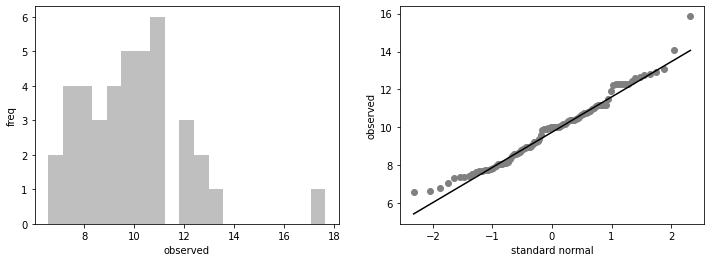

In [6]:
### normally distributed data
sample = stats.norm.rvs(loc=10,scale=2,size=40)

### positively skewed data (e.g. lognormal)
#sample = stats.lognorm.rvs(0.5,size=100)

### negatively skewed data (e.g. constant - lognormal)
#sample = 20 - stats.lognorm.rvs(0.5,size=100)

### leptokurtic (heavy-tailed) data (e.g. Student's t-distribution with df=2)
#sample = stats.t.rvs(2,loc=200,size=100)

### platykurtic (thin-tailed) data (e.g. uniform distribution)
#sample = stats.uniform.rvs(loc=10,scale=20,size=100)

do_plots(sample)

It can also be a useful way to identify the data points that are responsible for any deviations from normality.

#### Application

Run the code below to see the histograms and Q-Q plots for log(temperature) for each star type:

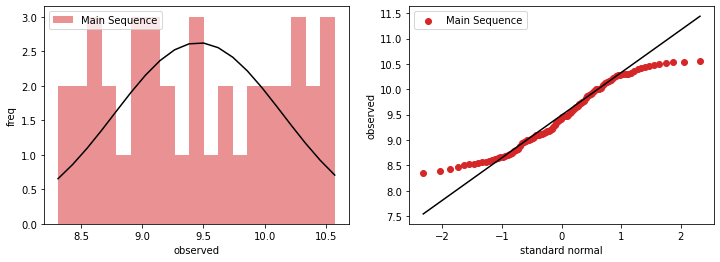

Main Sequence
mean: 9.45854684803285    SD: 0.6868533737427686


In [7]:
### Set the star type to test
t = 3

sample = data[data.type == t].temperature.apply(np.log)
col= 'C' + str(t)
lab= type_key[t]

mu = sample.mean()
sigma = sample.std()

do_plots(sample,col,lab,mu,sigma)
print(type_key[t])
print('mean:', mu, '   SD:', sigma)

#### ii) Saphiro-Wilk test

For which of the star types does log(temperature) appear approximately normal?

For a more rigorous investigation of normality, we can use a statistical test:

The [*Shapiro–Wilk test*](https://en.wikipedia.org/wiki/Shapiro–Wilk_test) tests the null hypothesis that a sample $x_1, ..., x_n$ came from a normally distributed population.

It compares statistics obtained from the observed data to the expected values of statistics sampled from the standard normal distribution.

#### Application

The Shapiro-Wilk test is easy to apply in scipy:

In [8]:
### set the star type to test
t = 5

sample = data[data.type == t].temperature.apply(np.log)
p_value = stats.shapiro(sample)[1]

print(type_key[t])
print('p =', p_value)

Hypergiant
p = 5.311141535457864e-07


Apply the Shapiro-Wilk test to each of the star types. Which of them produce p-values less than $\alpha$? 

### Alternative tests for normality

Many other tests for normality have been developed, including the Anderson-Darling, Cramér–von Mises and Kolmogorov-Smirnov (see below) tests. 

The Shapiro-Wilk test has been found to have the best statistical power for a given significance level.

<br>